Step 0: Read about reproducibility

 Read the assigned chapters, Chapters 2 and 3, from The Practice of Reproducible Research (University of California Press, 2018).

Kitzes, J., Turek, D., & Deniz, F. (Eds.). (2018). The practice of reproducible research: case studies and lessons from the data-intensive sciences. Univ of California Press Chapter 2: Assessing ReproducibilityLinks to an external site. and Chapter 3: The Basic Reproducible Workflow

Step 1: Data extraction

Your assignment is to create an informative graph, starting from scratch, and following best practices for reproducible research. You are allowed to collect data of your choice. For example, you could collect through one of the following means:

Web-data using web-scraping APIs (similar to what we discussed in class)
Twitter data using the Twitter API (e.g., https://python-twitter.readthedocs.io/en/latest/getting_started.htmlLinks to an external site.)
Wikipedia data using the Wikipedia API (e.g., https://pypi.org/project/Wikipedia-API/Links to an external site.)
Survey data with Google Forms or street interviews
 If you use an API/Libraries (e.g.., BeautifulSoup/TwitterAPI/WikipediaAPI) to collect data, please include what API you used and your code that makes API calls. If you choose not to use an API to collect data, note that each of the datasets should have at least 50 data points with at least 4 attributes each. If you are using API/Libraries, the expectation is that you collect data that has more than 200 data points with at least 4 attributes each. In any case, you are, of course, allowed to gather and merge data from different sources, but do cite all the sources and clearly mention your merging criteria.

Step 2: Data transformation and load

Almost always when working with real-world data, we need to process the data to prepare it for analysis. For example, we may wish to convert times or dates, group certain sets of answers together, normalize columns (e.g., convert strings into floats), or any number of other operations. API responses may come in JSON format. Perform what processing steps you see fit to the raw data, ensuring that you keep a copy of the raw data, and save the processed data to a CSV file. This processed data will be the file that you share on data.world.

Step 3: Analysis: Summary and visualizations

For this assignment, the analysis requested is fairly minimal. We would like to visualize some element of the data collected. This could be a trend over time or a point-in-time comparison. To aid you in choosing what to plot on your graph, consider: what surprised you about your data? What do you think is most important about your data?

Obtain basic descriptive statistics, plot your data using suitable visualization graphs and charts. Make sure that your graphs have descriptive titles; labels for any axes, including units; and legends, wherever needed. All plots should be shown in the Jupyter notebook.

 Step 4: Documentation

We will follow best practices for documentation as described in the readings on reproducibility. You need to have documentation in three places: your Jupyter notebook, your README file on GitHub, and with your dataset on data.world.

 Your Jupyter notebook should include:

Clear descriptions of each collection and processing step in Markdown sentences, not code comments
Your README should include:

The goal of your project
Links to any relevant API documentation
The license of your data and any source data
A data type and description for each attribute in your data
Any known issues or potential issues, such as sources of bias in collection
Your dataset at data.world should be accompanied by:

A project summary that explains your collection, processing and analysis methods as a high level, as well as links to your GitHub repo
A data dictionary with a data type and description for each attribute in your data
 Step 5: Publication and Submission

Submit your processed data as a CSV file on data.world. Add a brief project description, your project summary, and your data dictionary.

 Create a public GitHub repository for your analysis. Upload your code and data. Add a README and a LICENSE for the repo. The README should include all of your documentation about the data (such as its provenance, any quirks in your data, potential biases, etc.) and the analysis (what you are showing, and why). The LICENSE should be an MIT LicenseLinks to an external site. for your code.

 On Canvas, submit links to your GitHub repo and data.world dataset, as well as the image file of your final visualization.

Tip: someone who stumbles across your GitHub repo should be able to fully reproduce your analysis. In that event, what information would that person want or need? Make sure you include it!

 

Grading Scheme (Total Points = 15)

[1] Setting up the GitHub repository, clean and concise README with project goals and descriptions mentioned, incorporation of MIT license [2 Points]

[2] Implementation of the ETL method [6 Points]

[2.1] Data Extraction [2 marks],

[2.2] Data Transformation [3 marks],

[2.3] Load [1 Mark], which includes storing the data in CSV and uploading the data to data.world

[3] Clean Data at data.world  with proper project summary and data dictionary definitions [2 Points]

[4] Data Analysis and Visualization [4 Points]

[4.1] Descriptive Statistics [1 Mark],

[4.2] Visualizations [2 Marks]

[4.3] Insights [1 Amrk]

[5] Pushing your code (ipynb file) to your GitHub repo properly + code quality [1 Point]

# Prepairing the webscrape for conversion to CSV

In [40]:
import pandas as pd

import requests

import numpy as np

import matplotlib.pyplot as plt

from bs4 import BeautifulSoup

from unicodedata import normalize


url = "https://www.baseball-reference.com/players/gl.fcgi?id=bondsba01&t=b&year=2001"
        
website_data = requests.get(url)

bs = BeautifulSoup(website_data.content, "html.parser")

title = bs.title.string

title_list = title.split("|")

player_name = title_list[0]

print(f"Title for data set: {player_name}")

table = pd.read_html(url)

infos = table[4] #this contains the game logs of the player



Title for data set: Barry Bonds 2001 Batting Game Logs 


# Creating the csv for the data

In [41]:
file_name = (f"{player_name}data.csv")
file_name = file_name.replace(" ","_") 
infos.to_csv(file_name, index = False)

# Opening the CSV File and Preprocessing the data

In [42]:
season_data_df = pd.read_csv("Barry_Bonds_2001_Batting_Game_Logs_data.csv")


season_data_df.head()

,Rk,Gcar,Gtm,Date,Tm,Unnamed: 5,Opp,Rslt,Inngs,PA,...,OBP,SLG,OPS,BOP,aLI,WPA,acLI,cWPA,RE24,Pos
0,1,2144,1,Apr 2,SFG,NaN,SDP,"W,3-2",CG,5,...,.600,1.333,1.933,3,.90,0.109,.96,0.07%,1.11,LF
1,2,2145,2,Apr 4,SFG,NaN,SDP,"W,8-7",CG,5,...,.500,.857,1.357,3,1.26,0.112,1.37,0.07%,0.23,LF
2,3,2146,3,Apr 5,SFG,NaN,SDP,"W,8-2",CG,4,...,.429,.636,1.065,3,.48,0.004,.54,0.00%,-0.16,LF
3,4,2147,4,Apr 6,SFG,@,LAD,"L,1-10",CG,4,...,.333,.467,.800,3,.38,-0.037,.45,-0.03%,-0.70,LF
4,5,2148,5,Apr 7,SFG,@,LAD,"L,4-10",CG,4,...,.273,.368,.641,3,.53,-0.017,.62,-0.01%,-0.27,LF


# Converting data 
    1.Printing out the current size of the data frame
    2.Finding all of the rows that dont have numarical data like the different moths
    3.Looping through the `month_list` and removing all of the rows
    4. Checking to see if the data was actually removes

In [43]:
#1
print(season_data_df.shape)

#2
month_list =[]
for i in season_data_df["Rk"]:
    try:
        num = int(i)
    except:
        month_list.append(i)
#3
for i in month_list:   
    season_data_df = season_data_df[season_data_df["Rk"].str.contains(str(i)) == False]

file_name = (f"{player_name}data_FINAL.csv")
#4
print(season_data_df.shape)


    


(159, 38)
(153, 38)


# Using Plots to create a graphic of the data

0      1
1      0
2      0
3      0
4      0
      ..
153    0
154    1
155    2
156    0
157    1
Name: HR, Length: 153, dtype: object


'\nx = season_data_df["Hr"].Height\n\ny = season_data_df["Rk"].Latitude\n\nplt.scatter(x,y)\n\nplt.show()\n'

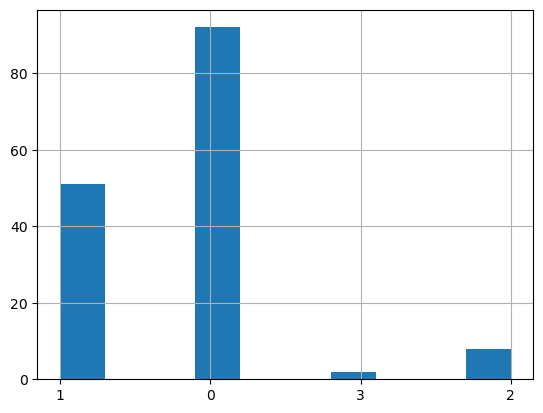

In [44]:
homeruns = season_data_df["HR"]
print (homeruns)
homeruns.hist(bins = 10)

"""
x = season_data_df["Hr"].Height

y = season_data_df["Rk"].Latitude

plt.scatter(x,y)

plt.show()
"""

In [45]:
infos.to_csv(file_name, index = False)

# Plotting the Data on a standard plot

1
1
1
1
1
1
1
2
3
4
5
6
7
7
8
8
8
9
9
10
10
11
11
12
13
14
14
14
14
14
14
15
15
15
15
15
16
17
20
22
23
24
24
25
25
26
26
26
28
29
29
29
30
31
32
32
32
32
33
33
34
36
36
36
37
38
38
39
39
39
39
39
39
39
39
39
39
39
39
39
39
40
40
40
40
40
40
42
42
42
42
42
42
42
42
44
45
45
45
45
46
46
47
47
48
48
49
50
50
51
51
53
53
54
54
54
54
55
55
55
55
56
56
56
56
57
57
57
58
59
59
60
60
60
63
63
63
64
64
64
66
67
67
67
68
69
69
69
69
70
72
72
73
1
2
3
3
3
3
3
4
6
8
9
10
11
12
13
13
13
14
15
17
17
18
18
19
22
23
23
23
25
25
25
26
28
29
30
31
32
33
37
39
40
42
44
45
46
47
47
47
49
50
50
50
52
54
56
56
56
57
59
60
62
65
65
65
68
69
69
70
70
70
70
71
71
72
72
72
73
74
76
77
79
81
82
82
82
82
83
85
85
85
85
85
86
87
87
89
92
94
95
97
99
99
100
102
105
105
106
107
108
109
109
111
112
114
114
114
115
116
117
118
119
122
122
123
124
125
125
125
126
128
128
129
132
133
136
136
137
139
140
141
143
144
144
145
147
148
148
149
150
151
153
154
156
1
1
1
1
1
1
1
2
5
8
9
11
12
12
14
14
14
16
18
21
21
22
22
24


Text(0.5, 0, 'Game Number')

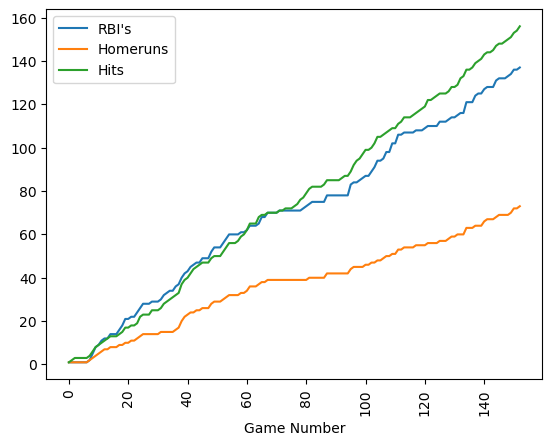

In [46]:
homeruns = 0
homeruns_list = []

hits = 0
hits_list = []

RBI = 0
RBI_list = []

"""
date_list = []
date_list.clear()

print(len(season_data_df["HR"]))
print(len(season_data_df["Date"]))
"""

for i in season_data_df["HR"]:
    homeruns = homeruns + int(i)
    homeruns_list.append(homeruns)
    print(homeruns)

for i in season_data_df["H"]:
    hits = hits + int(i)
    hits_list.append(hits)
    print(hits)

for i in season_data_df["RBI"]:
    RBI = RBI + int(i)
    RBI_list.append(RBI)
    print(RBI)
    
    """
counter = 0
for i in season_data_df["Date"]:
    counter = counter +1
    if (counter % 10 == 1):
        date_list.append(i)
    else:
        date_list.append(" ")
        
print(date_list)
print(homeruns)

"""

print(f"{len(date_list)}, {len(homeruns_list)}")

plt.plot(RBI_list, label = "RBI's")
plt.plot(homeruns_list, label = "Homeruns")
plt.plot(hits_list, label = "Hits")
plt.legend(loc="upper left")
plt.xticks(rotation='vertical')
plt.xlabel("Game Number")

# Analysis
For the bottom graphs I wanted to show the amount of games that Barry had tracked with different amounts of hits. <br>
For the bottom graph I wanted to show the impressive hitting of Barry throughout the season tracking along the season with his RBI's, HR's and Hits.